In [231]:
import re
from matplotlib import pyplot as plt

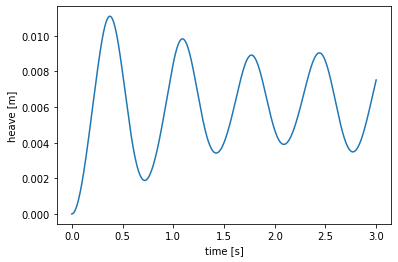

highest heave position = 0.0111007072651
heave equilibrium position = 0.00596471724616
second heave equilibrium position = 0.00691754730933


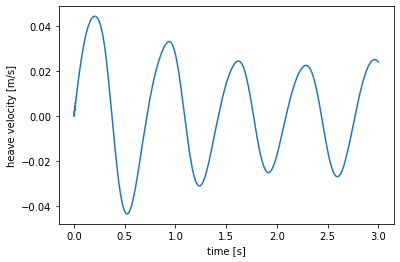

In [687]:
text = ""
with open("log.interFoam") as file:
    text = file.read()

centre_lines = re.findall(r'Courant Number mean: ([\d\.e-]+) max: ([\d\.e-]+).*?' +
    r'Time = ([\d\.e-]+)\n+.*?' +
    r'Linear velocity: \(([\d\.e-]+) ([\d\.e-]+) ([\d\.e-]+)\)\n+.*?' +
    r'Centre of rotation: \(([\d\.e-]+) ([\d\.e-]+) ([\d\.e-]+)\)', text, flags=re.DOTALL)

cos = []
maxcos = []
ts = []
pos = []
vels = []
for line in centre_lines:
    cos.append(float(line[0]))
    maxcos.append(float(line[1]))
    ts.append(float(line[2]))
    vels.append(float(line[5]))
    pos.append(float(line[8]))

plt.plot(ts, pos)
plt.ylabel("heave [m]")
plt.xlabel("time [s]");
plt.show()
plt.plot(ts, vels)
plt.ylabel("heave velocity [m/s]")
plt.xlabel("time [s]")
print(f"highest heave position = {max(pos)}")
print(f"heave equilibrium position = {pos[vels.index(max(vels))]}")
print(f"second heave equilibrium position = {pos[vels.index(min(vels))]}")

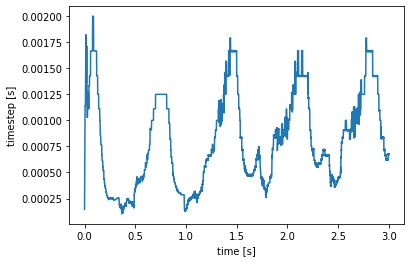

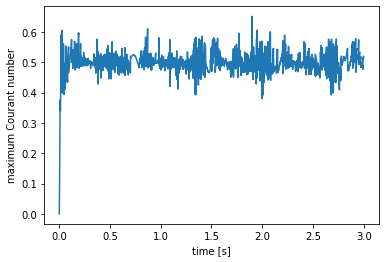

In [688]:
plt.plot(ts[:-1], list(map(lambda x: x[1] - x[0], zip(ts, ts[1:]))))
# plt.yscale('log')
plt.xlabel("time [s]")
plt.ylabel("timestep [s]")
plt.show()
plt.plot(ts, maxcos)
# plt.yscale('log')
plt.xlabel("time [s]")
plt.ylabel("maximum Courant number");

In [384]:
import pandas as pd

In [669]:
data51 = pd.read_csv("./experimental/MeasurementRawData_51.lvm", skiprows=24, sep="\s+", header=None)
data51 = data51[(data51[0]>116.8)&(data51[0]<120)]

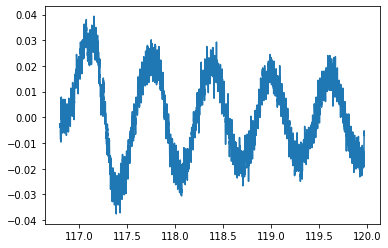

In [683]:
ys51 = np.convolve(data51[2], np.ones(50) / 50, mode='valid')
plt.plot(data51[0][:-50], np.diff(ys51))
# plt.ylim((160, 180))
# plt.xlim((116.8,120))

In [601]:
import numpy as np

In [602]:
M = np.arange(-100, 100, 0.001)

In [604]:
M -= np.pi + 2 * np.pi * np.floor(M / (2 * np.pi))

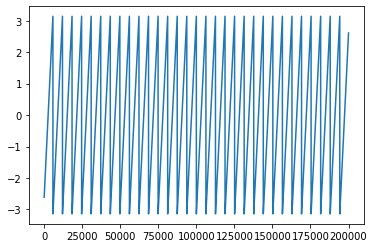

In [606]:
plt.plot(M)